In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [98]:
df=pd.read_csv('spam.csv',encoding='ISO-8859-1')

In [99]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [100]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


steps for whole project 
1.  Data cleaning
2. EDA
3. Text preprocessing
4. Evaluation
5. Improvement
7. Website
8. Deploy

1. Data cleaning

In [101]:
df.isnull().sum()  #checking null values

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [102]:
df.info() #checking data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [103]:
# as on dropping those three cols 'Unnamed: 2','Unnamed: 3','Unnamed: 4' there is going to be no effect on our further task
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)


In [104]:
df.shape

(5572, 2)

In [105]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [106]:
df.rename(columns={'v1':'target','v2':'msg'},inplace=True)
df.head()

,target,msg
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [107]:
df.isnull().sum()

target    0
msg       0
dtype: int64

In [108]:
df['target'].unique()

array(['ham', 'spam'], dtype=object)

In [109]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['target']=le.fit_transform(df['target'])
df.head()

,target,msg
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [110]:
# no to
df.duplicated().sum() 

403

In [111]:
# shape before dropping duplicates
df.shape 

(5572, 2)

In [112]:
df=df.drop_duplicates(keep='first')
df.duplicated().sum() 

0

In [113]:
# shape after dropping duplicates 
df.shape

(5169, 2)

2. EDA

In [114]:
df['target'].value_counts()
# ham= 4516  spam= 653

0    4516
1     653
Name: target, dtype: int64

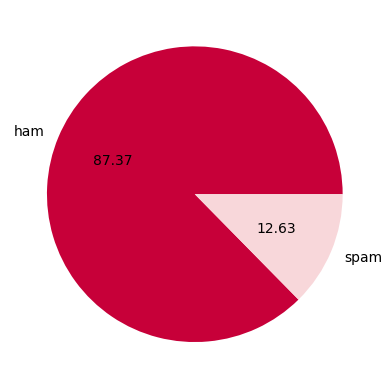

In [115]:
# using piechart to check how much % we have ham and spam
plt.pie(df['target'].value_counts(),labels=['ham','spam'],colors = [ '#C70039', '#F8D7DA'],autopct="%.2f")
plt.show()

In [116]:
import nltk

In [117]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sakshi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

- now we are going to make 3 more columns that are no of char,no to words,no of sentences in msg (we need to create 3 more features based on already existing features)

In [118]:
# no of char
df['num_char']=df['msg'].apply(len)
df

,target,msg,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [119]:
# no of words
df['num_words']=df['msg'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,target,msg,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [120]:
# number of sentences
df['num_sent']=df['msg'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()


,target,msg,num_char,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [121]:
df[['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [122]:
# describe output for ham
df[df['target']==0][['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [123]:
# describe output for spam
df[df['target']==1][['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [124]:
import seaborn as sns


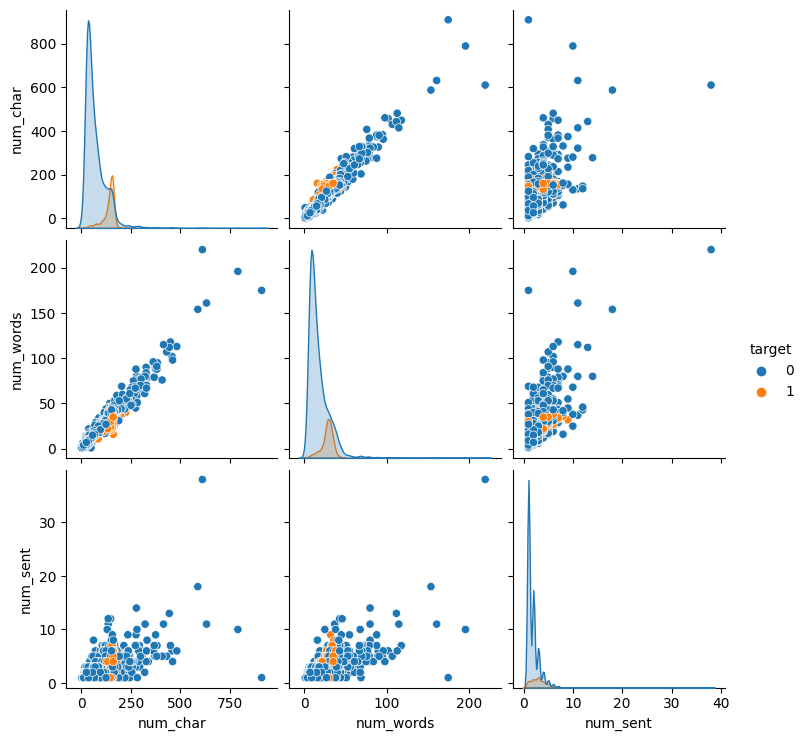

In [125]:
sns.pairplot(df,hue='target')

C:\Users\Sakshi\AppData\Local\Temp\ipykernel_22304\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

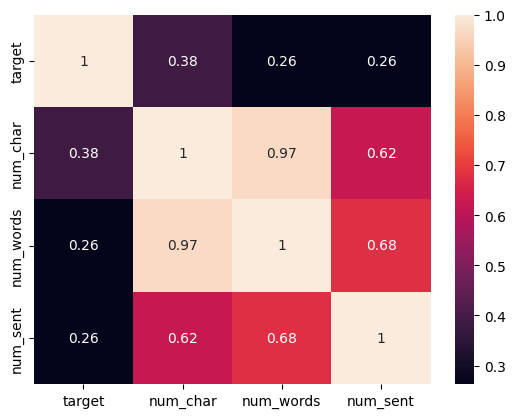

In [126]:
sns.heatmap(df.corr(),annot=True)

- from the above heatmap we can conclude that there is multicolinearity between num of char, num of words and num of sentences. Hence we can opt with any one of them.
- As we can also conclude that num of char is more correlated to target as compared to other two features. Therefore we will go with num of char col

3. Data preprocessing
- lower case
- tokenization
- removing special characters
- removing stop words and punction
- stemming

In [127]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [128]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [129]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
def transform_text(msg):
    msg=msg.lower()  #convert all letters to lower case
    msg=nltk.word_tokenize(msg) #break to tokens
    y=[] #to remove special char
    for i in msg:
        if i.isalnum():
            y.append(i)
    
    msg=y[:]
    y.clear() #to remove stop words and punctuation
    for i in msg:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    msg=y[:]
    y.clear()

    for i in msg: #stemming
        y.append(ps.stem(i))
    return " ".join(y)

In [130]:
transform_text('Helloo how Are YOU34%! sakshi playing')

'helloo you34 sakshi play'

In [131]:
transform_text(df['msg'][10])

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [132]:
df['transformed_text']=df['msg'].apply(transform_text)

In [133]:
df.head()

,target,msg,num_char,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [134]:
spam_corpus=[]
for msg in  df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word) 
        

In [135]:
print("length of spam_corpus ",len(spam_corpus))
spam_corpus

length of spam_corpus  9939


['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [136]:
ham_corpus=[]
for msg in  df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word) 

In [137]:
print("length of ham_corpus ",len(ham_corpus))
ham_corpus

length of ham_corpus  35404


['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 'gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'cri',
 'enough',
 'today',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 'watch',
 'eh',
 'u',
 'rememb',
 '2',
 'spell',
 'name',
 'ye',
 'v',
 'naughti',
 'make',
 'v',
 'wet',
 'fine',
 'thatåõ',
 'wa

In [140]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))[0] #top 30 words in spam

0        call
1        free
2           2
3         txt
4        text
5           u
6          ur
7       mobil
8        stop
9       repli
10      claim
11          4
12      prize
13        get
14        new
15     servic
16       tone
17       send
18     urgent
19      nokia
20    contact
21      award
22      phone
23       cash
24      pleas
25       week
26        win
27          c
28    collect
29        min
Name: 0, dtype: object

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given